## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  30.589100  1341.405845  0.261919  4.679904  1.538628
1  69.107067  1692.504931  0.712898  5.437121  1.513862
2  51.876626  1060.058283  0.527126  7.610737  1.352127
3  89.221874  1675.098108  0.974838  6.273276  1.619291
4  65.891390  1514.091197  0.029854  1.333732  0.603984


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9492377	total: 106ms	remaining: 1m 46s
1:	learn: 0.9404259	total: 107ms	remaining: 53.3s
2:	learn: 0.9288806	total: 108ms	remaining: 36s
3:	learn: 0.9196552	total: 111ms	remaining: 27.5s
4:	learn: 0.9095803	total: 112ms	remaining: 22.3s
5:	learn: 0.9012284	total: 117ms	remaining: 19.4s
6:	learn: 0.8922642	total: 119ms	remaining: 16.8s
7:	learn: 0.8834748	total: 120ms	remaining: 14.9s
8:	learn: 0.8750288	total: 122ms	remaining: 13.5s
9:	learn: 0.8662802	total: 123ms	remaining: 12.2s
10:	learn: 0.8573916	total: 123ms	remaining: 11.1s
11:	learn: 0.8491975	total: 127ms	remaining: 10.5s
12:	learn: 0.8407006	total: 128ms	remaining: 9.68s
13:	learn: 0.8323265	total: 129ms	remaining: 9.07s
14:	learn: 0.8254977	total: 130ms	remaining: 8.53s
15:	learn: 0.8177202	total: 132ms	remaining: 8.09s
16:	learn: 0.8096199	total: 133ms	remaining: 7.7s
17:	learn: 0.8007122	total: 135ms	remaining: 7.37s
18:	learn: 0.7920676	total: 136ms	remaining: 7.02s
19:	learn: 0.

36:	learn: 0.6709955	total: 161ms	remaining: 4.2s
37:	learn: 0.6656649	total: 162ms	remaining: 4.11s
38:	learn: 0.6592116	total: 163ms	remaining: 4.01s
39:	learn: 0.6527670	total: 166ms	remaining: 3.98s
40:	learn: 0.6484055	total: 171ms	remaining: 4s
41:	learn: 0.6428966	total: 172ms	remaining: 3.91s
42:	learn: 0.6364645	total: 172ms	remaining: 3.83s
43:	learn: 0.6304938	total: 173ms	remaining: 3.76s
44:	learn: 0.6258166	total: 174ms	remaining: 3.7s
45:	learn: 0.6199486	total: 176ms	remaining: 3.64s
46:	learn: 0.6149227	total: 177ms	remaining: 3.58s
47:	learn: 0.6106311	total: 179ms	remaining: 3.55s
48:	learn: 0.6048494	total: 182ms	remaining: 3.53s
49:	learn: 0.6002433	total: 184ms	remaining: 3.49s
50:	learn: 0.5958095	total: 185ms	remaining: 3.44s
51:	learn: 0.5906866	total: 186ms	remaining: 3.39s
52:	learn: 0.5862111	total: 187ms	remaining: 3.33s
53:	learn: 0.5817141	total: 187ms	remaining: 3.28s
54:	learn: 0.5758374	total: 188ms	remaining: 3.23s
55:	learn: 0.5734340	total: 189ms	re

123:	learn: 0.3628750	total: 294ms	remaining: 2.07s
124:	learn: 0.3613731	total: 294ms	remaining: 2.06s
125:	learn: 0.3594362	total: 302ms	remaining: 2.1s
126:	learn: 0.3574100	total: 304ms	remaining: 2.09s
127:	learn: 0.3555285	total: 305ms	remaining: 2.08s
128:	learn: 0.3534357	total: 308ms	remaining: 2.08s
129:	learn: 0.3516517	total: 309ms	remaining: 2.07s
130:	learn: 0.3495321	total: 310ms	remaining: 2.06s
131:	learn: 0.3473858	total: 311ms	remaining: 2.05s
132:	learn: 0.3450426	total: 312ms	remaining: 2.03s
133:	learn: 0.3430643	total: 313ms	remaining: 2.02s
134:	learn: 0.3413605	total: 313ms	remaining: 2.01s
135:	learn: 0.3396766	total: 314ms	remaining: 2s
136:	learn: 0.3378094	total: 314ms	remaining: 1.98s
137:	learn: 0.3360004	total: 315ms	remaining: 1.97s
138:	learn: 0.3345516	total: 316ms	remaining: 1.96s
139:	learn: 0.3322859	total: 316ms	remaining: 1.94s
140:	learn: 0.3305613	total: 317ms	remaining: 1.93s
141:	learn: 0.3285101	total: 319ms	remaining: 1.93s
142:	learn: 0.32

202:	learn: 0.2501068	total: 390ms	remaining: 1.53s
203:	learn: 0.2487392	total: 391ms	remaining: 1.52s
204:	learn: 0.2476874	total: 391ms	remaining: 1.52s
205:	learn: 0.2468483	total: 392ms	remaining: 1.51s
206:	learn: 0.2458677	total: 404ms	remaining: 1.55s
207:	learn: 0.2449933	total: 404ms	remaining: 1.54s
208:	learn: 0.2441899	total: 407ms	remaining: 1.54s
209:	learn: 0.2431910	total: 414ms	remaining: 1.56s
210:	learn: 0.2420199	total: 415ms	remaining: 1.55s
211:	learn: 0.2409962	total: 416ms	remaining: 1.54s
212:	learn: 0.2395419	total: 416ms	remaining: 1.54s
213:	learn: 0.2384379	total: 417ms	remaining: 1.53s
214:	learn: 0.2376380	total: 418ms	remaining: 1.52s
215:	learn: 0.2370452	total: 418ms	remaining: 1.52s
216:	learn: 0.2363234	total: 432ms	remaining: 1.56s
217:	learn: 0.2357405	total: 432ms	remaining: 1.55s
218:	learn: 0.2350011	total: 433ms	remaining: 1.54s
219:	learn: 0.2344439	total: 433ms	remaining: 1.54s
220:	learn: 0.2333766	total: 434ms	remaining: 1.53s
221:	learn: 

304:	learn: 0.1745199	total: 534ms	remaining: 1.22s
305:	learn: 0.1742363	total: 537ms	remaining: 1.22s
306:	learn: 0.1734444	total: 538ms	remaining: 1.21s
307:	learn: 0.1723992	total: 538ms	remaining: 1.21s
308:	learn: 0.1721042	total: 539ms	remaining: 1.2s
309:	learn: 0.1713351	total: 539ms	remaining: 1.2s
310:	learn: 0.1705764	total: 547ms	remaining: 1.21s
311:	learn: 0.1702374	total: 557ms	remaining: 1.23s
312:	learn: 0.1694954	total: 559ms	remaining: 1.23s
313:	learn: 0.1687681	total: 580ms	remaining: 1.27s
314:	learn: 0.1680552	total: 581ms	remaining: 1.26s
315:	learn: 0.1673563	total: 582ms	remaining: 1.26s
316:	learn: 0.1666754	total: 583ms	remaining: 1.25s
317:	learn: 0.1664075	total: 583ms	remaining: 1.25s
318:	learn: 0.1659802	total: 586ms	remaining: 1.25s
319:	learn: 0.1653168	total: 587ms	remaining: 1.25s


320:	learn: 0.1646686	total: 587ms	remaining: 1.24s
321:	learn: 0.1643614	total: 595ms	remaining: 1.25s
322:	learn: 0.1641044	total: 596ms	remaining: 1.25s
323:	learn: 0.1638398	total: 598ms	remaining: 1.25s
324:	learn: 0.1634775	total: 598ms	remaining: 1.24s
325:	learn: 0.1628456	total: 600ms	remaining: 1.24s
326:	learn: 0.1624329	total: 601ms	remaining: 1.24s
327:	learn: 0.1618148	total: 601ms	remaining: 1.23s
328:	learn: 0.1614107	total: 601ms	remaining: 1.23s
329:	learn: 0.1610526	total: 603ms	remaining: 1.22s
330:	learn: 0.1604557	total: 608ms	remaining: 1.23s
331:	learn: 0.1598708	total: 609ms	remaining: 1.23s
332:	learn: 0.1592499	total: 610ms	remaining: 1.22s
333:	learn: 0.1587141	total: 611ms	remaining: 1.22s
334:	learn: 0.1581887	total: 612ms	remaining: 1.22s
335:	learn: 0.1576247	total: 614ms	remaining: 1.21s
336:	learn: 0.1569364	total: 615ms	remaining: 1.21s
337:	learn: 0.1566541	total: 618ms	remaining: 1.21s
338:	learn: 0.1562751	total: 620ms	remaining: 1.21s
339:	learn: 

356:	learn: 0.1488417	total: 684ms	remaining: 1.23s
357:	learn: 0.1483869	total: 685ms	remaining: 1.23s
358:	learn: 0.1481577	total: 686ms	remaining: 1.23s
359:	learn: 0.1476349	total: 687ms	remaining: 1.22s
360:	learn: 0.1473553	total: 687ms	remaining: 1.22s
361:	learn: 0.1466278	total: 688ms	remaining: 1.21s
362:	learn: 0.1461764	total: 689ms	remaining: 1.21s
363:	learn: 0.1460188	total: 695ms	remaining: 1.21s
364:	learn: 0.1458174	total: 729ms	remaining: 1.27s
365:	learn: 0.1453180	total: 766ms	remaining: 1.33s
366:	learn: 0.1446157	total: 780ms	remaining: 1.34s
367:	learn: 0.1439274	total: 792ms	remaining: 1.36s
368:	learn: 0.1437153	total: 794ms	remaining: 1.36s
369:	learn: 0.1435449	total: 794ms	remaining: 1.35s
370:	learn: 0.1430842	total: 795ms	remaining: 1.35s
371:	learn: 0.1428794	total: 803ms	remaining: 1.36s
372:	learn: 0.1426922	total: 804ms	remaining: 1.35s
373:	learn: 0.1421106	total: 805ms	remaining: 1.35s
374:	learn: 0.1417816	total: 806ms	remaining: 1.34s
375:	learn: 

397:	learn: 0.1326601	total: 832ms	remaining: 1.26s
398:	learn: 0.1321591	total: 833ms	remaining: 1.25s
399:	learn: 0.1315151	total: 834ms	remaining: 1.25s
400:	learn: 0.1310512	total: 836ms	remaining: 1.25s
401:	learn: 0.1301842	total: 837ms	remaining: 1.24s
402:	learn: 0.1297430	total: 837ms	remaining: 1.24s
403:	learn: 0.1293750	total: 838ms	remaining: 1.24s
404:	learn: 0.1288250	total: 838ms	remaining: 1.23s
405:	learn: 0.1284499	total: 840ms	remaining: 1.23s
406:	learn: 0.1279820	total: 842ms	remaining: 1.23s
407:	learn: 0.1274460	total: 844ms	remaining: 1.23s
408:	learn: 0.1267616	total: 845ms	remaining: 1.22s
409:	learn: 0.1263631	total: 846ms	remaining: 1.22s
410:	learn: 0.1262211	total: 847ms	remaining: 1.21s
411:	learn: 0.1260882	total: 849ms	remaining: 1.21s
412:	learn: 0.1252685	total: 849ms	remaining: 1.21s
413:	learn: 0.1247592	total: 851ms	remaining: 1.2s
414:	learn: 0.1243779	total: 864ms	remaining: 1.22s
415:	learn: 0.1240072	total: 868ms	remaining: 1.22s
416:	learn: 0

451:	learn: 0.1078422	total: 982ms	remaining: 1.19s
452:	learn: 0.1073735	total: 985ms	remaining: 1.19s
453:	learn: 0.1069052	total: 986ms	remaining: 1.19s
454:	learn: 0.1064544	total: 987ms	remaining: 1.18s
455:	learn: 0.1060156	total: 987ms	remaining: 1.18s
456:	learn: 0.1058858	total: 988ms	remaining: 1.17s
457:	learn: 0.1056138	total: 989ms	remaining: 1.17s
458:	learn: 0.1055416	total: 998ms	remaining: 1.18s
459:	learn: 0.1051191	total: 999ms	remaining: 1.17s
460:	learn: 0.1046776	total: 1s	remaining: 1.17s
461:	learn: 0.1045537	total: 1s	remaining: 1.17s
462:	learn: 0.1041459	total: 1s	remaining: 1.16s
463:	learn: 0.1037179	total: 1s	remaining: 1.16s
464:	learn: 0.1031719	total: 1.01s	remaining: 1.16s
465:	learn: 0.1029541	total: 1.01s	remaining: 1.15s
466:	learn: 0.1028349	total: 1.01s	remaining: 1.15s
467:	learn: 0.1022585	total: 1.01s	remaining: 1.15s
468:	learn: 0.1021919	total: 1.01s	remaining: 1.15s
469:	learn: 0.1020766	total: 1.01s	remaining: 1.14s
470:	learn: 0.1015141	to

509:	learn: 0.0904756	total: 1.13s	remaining: 1.09s
510:	learn: 0.0902115	total: 1.13s	remaining: 1.08s
511:	learn: 0.0898754	total: 1.14s	remaining: 1.08s
512:	learn: 0.0895933	total: 1.14s	remaining: 1.08s
513:	learn: 0.0891539	total: 1.14s	remaining: 1.07s
514:	learn: 0.0887236	total: 1.14s	remaining: 1.07s
515:	learn: 0.0882978	total: 1.14s	remaining: 1.07s
516:	learn: 0.0879698	total: 1.14s	remaining: 1.06s
517:	learn: 0.0875515	total: 1.14s	remaining: 1.06s
518:	learn: 0.0872293	total: 1.14s	remaining: 1.06s
519:	learn: 0.0871534	total: 1.14s	remaining: 1.05s
520:	learn: 0.0870791	total: 1.14s	remaining: 1.05s
521:	learn: 0.0867583	total: 1.14s	remaining: 1.05s
522:	learn: 0.0864444	total: 1.14s	remaining: 1.04s
523:	learn: 0.0860380	total: 1.19s	remaining: 1.08s
524:	learn: 0.0858689	total: 1.2s	remaining: 1.09s
525:	learn: 0.0855095	total: 1.2s	remaining: 1.08s
526:	learn: 0.0850812	total: 1.2s	remaining: 1.08s
527:	learn: 0.0849141	total: 1.2s	remaining: 1.08s
528:	learn: 0.08

539:	learn: 0.0812409	total: 1.25s	remaining: 1.06s
540:	learn: 0.0808349	total: 1.25s	remaining: 1.06s
541:	learn: 0.0804634	total: 1.25s	remaining: 1.06s
542:	learn: 0.0802308	total: 1.25s	remaining: 1.05s
543:	learn: 0.0800235	total: 1.25s	remaining: 1.05s
544:	learn: 0.0796991	total: 1.26s	remaining: 1.05s
545:	learn: 0.0795737	total: 1.26s	remaining: 1.05s
546:	learn: 0.0793500	total: 1.26s	remaining: 1.04s
547:	learn: 0.0792270	total: 1.26s	remaining: 1.04s
548:	learn: 0.0791063	total: 1.26s	remaining: 1.04s
549:	learn: 0.0789879	total: 1.27s	remaining: 1.04s
550:	learn: 0.0788717	total: 1.27s	remaining: 1.03s
551:	learn: 0.0787173	total: 1.27s	remaining: 1.03s
552:	learn: 0.0786031	total: 1.27s	remaining: 1.03s
553:	learn: 0.0782521	total: 1.27s	remaining: 1.03s
554:	learn: 0.0781013	total: 1.28s	remaining: 1.02s
555:	learn: 0.0779902	total: 1.28s	remaining: 1.02s
556:	learn: 0.0778425	total: 1.28s	remaining: 1.02s
557:	learn: 0.0777334	total: 1.28s	remaining: 1.01s
558:	learn: 

573:	learn: 0.0735133	total: 1.36s	remaining: 1.01s
574:	learn: 0.0733338	total: 1.36s	remaining: 1.01s
575:	learn: 0.0731992	total: 1.36s	remaining: 1s
576:	learn: 0.0729487	total: 1.36s	remaining: 1s
577:	learn: 0.0728169	total: 1.37s	remaining: 998ms
578:	learn: 0.0725720	total: 1.37s	remaining: 994ms
579:	learn: 0.0724754	total: 1.37s	remaining: 990ms
580:	learn: 0.0722360	total: 1.38s	remaining: 999ms
581:	learn: 0.0719370	total: 1.39s	remaining: 995ms
582:	learn: 0.0716170	total: 1.39s	remaining: 992ms
583:	learn: 0.0714450	total: 1.39s	remaining: 988ms
584:	learn: 0.0713165	total: 1.39s	remaining: 985ms
585:	learn: 0.0710036	total: 1.39s	remaining: 984ms
586:	learn: 0.0708358	total: 1.39s	remaining: 981ms
587:	learn: 0.0705443	total: 1.39s	remaining: 977ms
588:	learn: 0.0704190	total: 1.4s	remaining: 974ms
589:	learn: 0.0702552	total: 1.4s	remaining: 970ms
590:	learn: 0.0699594	total: 1.4s	remaining: 966ms
591:	learn: 0.0698369	total: 1.4s	remaining: 964ms
592:	learn: 0.0696772	

614:	learn: 0.0656446	total: 1.44s	remaining: 899ms
615:	learn: 0.0654906	total: 1.44s	remaining: 898ms
616:	learn: 0.0653443	total: 1.44s	remaining: 895ms
617:	learn: 0.0651869	total: 1.44s	remaining: 892ms
618:	learn: 0.0650427	total: 1.44s	remaining: 889ms
619:	learn: 0.0648921	total: 1.45s	remaining: 886ms
620:	learn: 0.0647498	total: 1.45s	remaining: 883ms
621:	learn: 0.0646098	total: 1.45s	remaining: 880ms
622:	learn: 0.0643985	total: 1.45s	remaining: 876ms
623:	learn: 0.0642642	total: 1.45s	remaining: 873ms
624:	learn: 0.0641108	total: 1.45s	remaining: 870ms
625:	learn: 0.0638735	total: 1.45s	remaining: 867ms
626:	learn: 0.0634754	total: 1.45s	remaining: 864ms
627:	learn: 0.0632459	total: 1.45s	remaining: 860ms
628:	learn: 0.0628577	total: 1.45s	remaining: 857ms
629:	learn: 0.0626356	total: 1.45s	remaining: 853ms
630:	learn: 0.0622570	total: 1.45s	remaining: 850ms
631:	learn: 0.0619238	total: 1.45s	remaining: 847ms
632:	learn: 0.0617098	total: 1.45s	remaining: 843ms
633:	learn: 

782:	learn: 0.0420637	total: 1.58s	remaining: 437ms
783:	learn: 0.0419477	total: 1.58s	remaining: 434ms
784:	learn: 0.0419089	total: 1.58s	remaining: 432ms
785:	learn: 0.0417936	total: 1.58s	remaining: 430ms
786:	learn: 0.0417441	total: 1.58s	remaining: 428ms
787:	learn: 0.0416958	total: 1.58s	remaining: 425ms
788:	learn: 0.0416488	total: 1.58s	remaining: 423ms
789:	learn: 0.0414719	total: 1.58s	remaining: 420ms
790:	learn: 0.0414346	total: 1.58s	remaining: 418ms
791:	learn: 0.0412610	total: 1.58s	remaining: 416ms
792:	learn: 0.0412246	total: 1.58s	remaining: 413ms
793:	learn: 0.0411893	total: 1.58s	remaining: 411ms
794:	learn: 0.0410156	total: 1.58s	remaining: 408ms
795:	learn: 0.0409324	total: 1.58s	remaining: 406ms
796:	learn: 0.0408978	total: 1.58s	remaining: 404ms
797:	learn: 0.0407289	total: 1.59s	remaining: 402ms
798:	learn: 0.0406951	total: 1.59s	remaining: 399ms
799:	learn: 0.0406623	total: 1.59s	remaining: 397ms
800:	learn: 0.0404965	total: 1.59s	remaining: 395ms
801:	learn: 

891:	learn: 0.0326701	total: 1.71s	remaining: 207ms
892:	learn: 0.0325586	total: 1.71s	remaining: 205ms
893:	learn: 0.0325213	total: 1.71s	remaining: 203ms
894:	learn: 0.0324991	total: 1.71s	remaining: 201ms
895:	learn: 0.0324610	total: 1.72s	remaining: 199ms
896:	learn: 0.0323513	total: 1.72s	remaining: 197ms
897:	learn: 0.0322428	total: 1.72s	remaining: 195ms
898:	learn: 0.0321759	total: 1.72s	remaining: 193ms
899:	learn: 0.0321393	total: 1.72s	remaining: 191ms
900:	learn: 0.0320322	total: 1.72s	remaining: 189ms
901:	learn: 0.0319961	total: 1.73s	remaining: 188ms
902:	learn: 0.0319606	total: 1.73s	remaining: 186ms
903:	learn: 0.0319012	total: 1.73s	remaining: 184ms
904:	learn: 0.0317233	total: 1.73s	remaining: 182ms
905:	learn: 0.0316219	total: 1.73s	remaining: 179ms
906:	learn: 0.0315211	total: 1.73s	remaining: 177ms
907:	learn: 0.0314998	total: 1.73s	remaining: 175ms
908:	learn: 0.0314651	total: 1.73s	remaining: 173ms
909:	learn: 0.0314013	total: 1.73s	remaining: 171ms
910:	learn: 

987:	learn: 0.0266839	total: 1.85s	remaining: 22.5ms
988:	learn: 0.0266540	total: 1.89s	remaining: 21ms
989:	learn: 0.0266038	total: 1.89s	remaining: 19.1ms
990:	learn: 0.0265176	total: 1.89s	remaining: 17.2ms
991:	learn: 0.0264954	total: 1.89s	remaining: 15.3ms
992:	learn: 0.0263986	total: 1.89s	remaining: 13.3ms
993:	learn: 0.0263433	total: 1.89s	remaining: 11.4ms
994:	learn: 0.0262798	total: 1.89s	remaining: 9.52ms
995:	learn: 0.0262209	total: 1.9s	remaining: 7.61ms
996:	learn: 0.0261663	total: 1.9s	remaining: 5.71ms
997:	learn: 0.0261176	total: 1.9s	remaining: 3.8ms
998:	learn: 0.0260553	total: 1.9s	remaining: 1.9ms
999:	learn: 0.0260139	total: 1.9s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.506019565764872


ABC Pre-generator MAE 0.8054146923039205


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

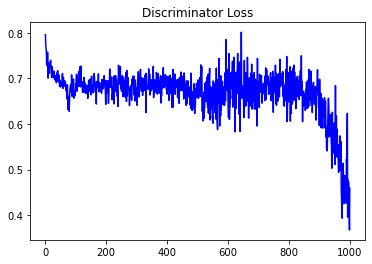

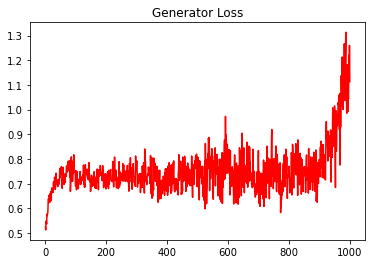

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.6045387267228216


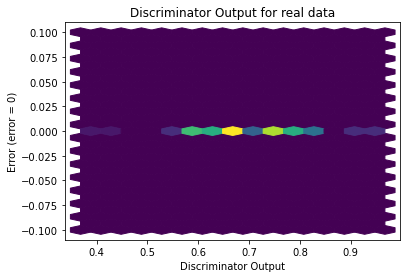

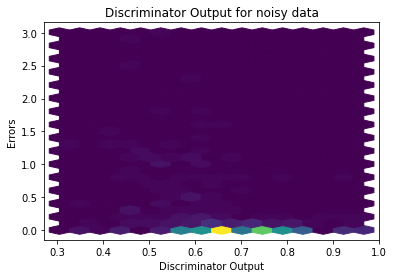

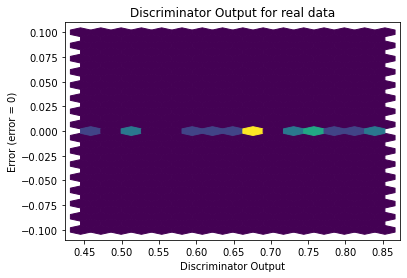

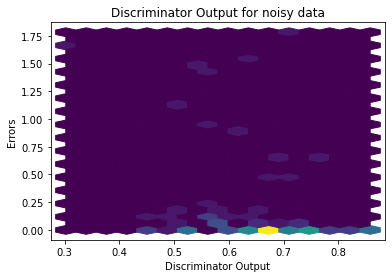

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

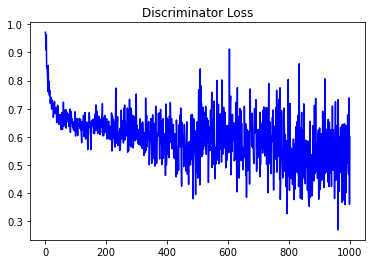

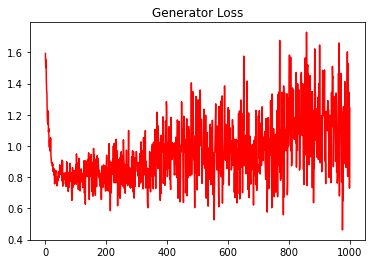

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
1.0918227121252566


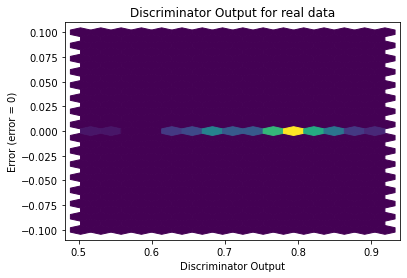

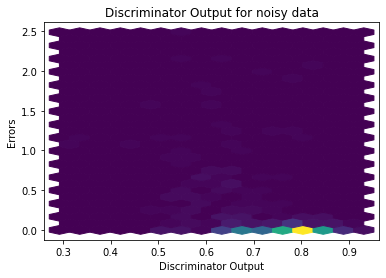

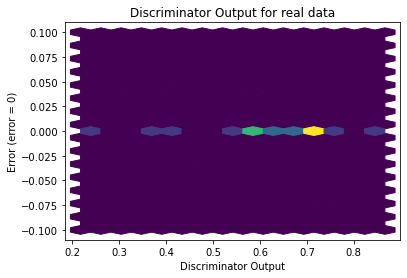

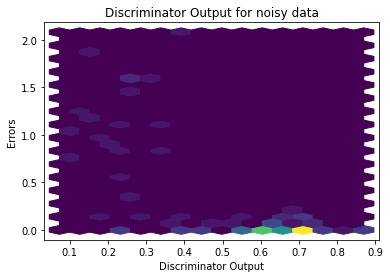

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


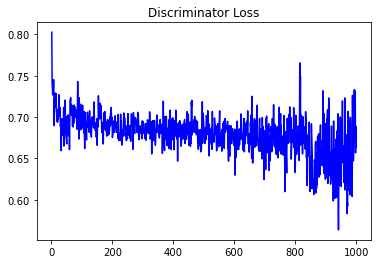

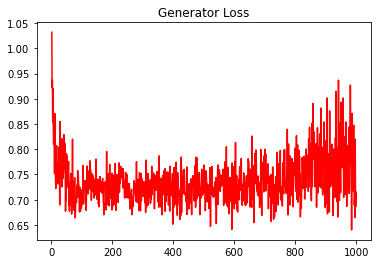

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
20.49571209743805


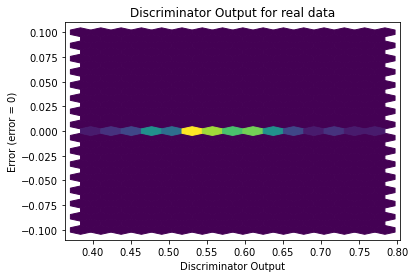

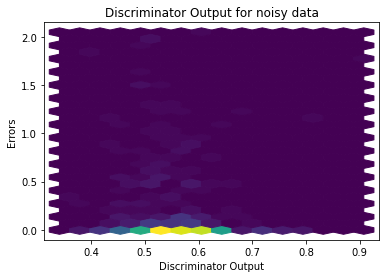

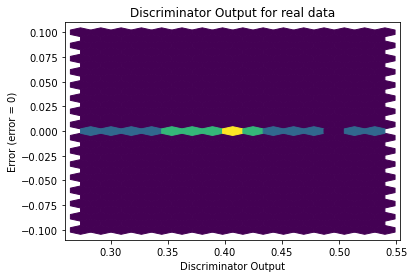

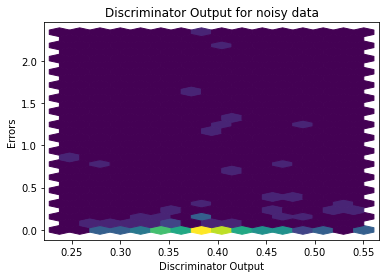

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


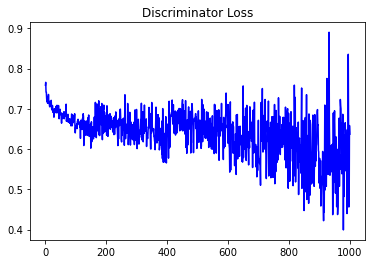

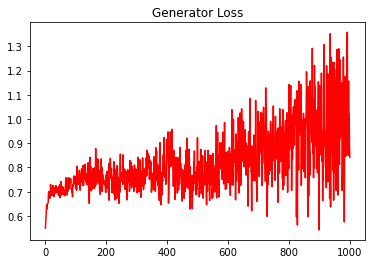

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.6773129944453249


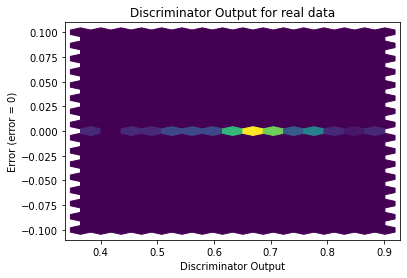

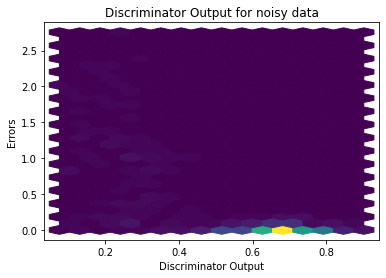

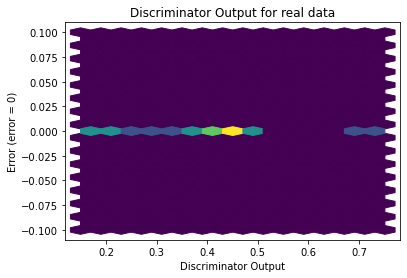

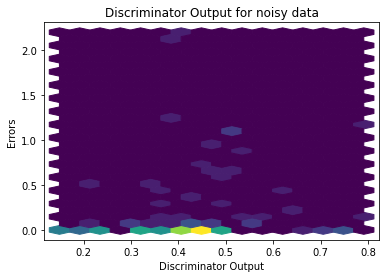

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1732]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4412]], requires_grad=True)
